<a href="https://colab.research.google.com/github/rugvedlanghi/28_DSLab_Experiments/blob/main/28_AI%26DS2_Expt05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset from the csv file
# separator is a vertical line, as seen in the dataset
data = pd.read_csv("/content/Iris.csv")

# Printing the shape of the dataset
print(data.shape)


(150, 6)


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# data = data.drop('Id',axis=1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("Shape of X is %s and shape of y is %s"%(X.shape,y.shape))


Shape of X is (150, 5) and shape of y is (150,)


In [ ]:
total_classes = y.nunique()
print("Number of unique species in dataset are: ",total_classes)


Number of unique species in dataset are:  3


In [ ]:
distribution = y.value_counts()
print(distribution)


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(
	X, y, test_size=0.25, random_state=28)


In [ ]:
# Creating adaboost classifier model
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,Y_train)

# Make predictions on the validation dataset
y_pred_ada = adb_model.predict(X_val)

In [ ]:
print("The accuracy of the model on validation set is", adb_model.score(X_val,Y_val))


The accuracy of the model on validation set is 1.0


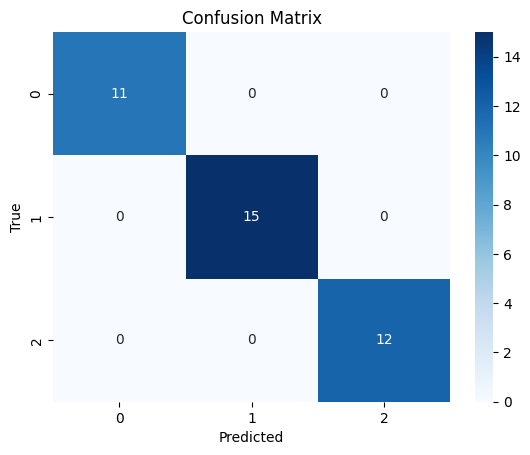

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred_ada)  # Replace y_pred_ada with your model's predictions

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
